In [1]:
#initialization
import matplotlib.pyplot as plt
import numpy as np

# importing Qiskit
from qiskit import IBMQ, Aer, assemble, transpile
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.providers.ibmq import least_busy
from qiskit.circuit.library import C3XGate
# import basic plot tools
from qiskit.visualization import plot_histogram


In [2]:
def initialize_s(qc, num_qubit, num_matching):
    """Apply a H-gate to 'qubits' in qc"""
    qc.x(num_qubit - 1)
    qc.h(num_qubit - 1)
    
    for q in range(num_matching):
        qc.h(q)
    #qc.reset(num_qubit)
    #qc.h(num_qubit)
        
    
    return qc

In [3]:
def violate_state():
    qc = QuantumCircuit(10)
    qc.ccx(0, 1, 6)
    qc.ccx(2, 3, 7)
    qc.ccx(4, 5, 8)
    qc.x([6, 7, 8])
    qc.append(C3XGate(), [6, 7, 8, 9])
    qc.x([6, 7, 8])
    qc.ccx(4, 5, 8)
    qc.ccx(2, 3, 7)
    qc.ccx(0, 1, 6)
    oracle_violate = qc.to_gate()
    oracle_violate.name = "violate"
    #qc.draw()
    return oracle_violate

In [4]:
def weight():
    # 101
    # 101
    # 011   
    qc = QuantumCircuit(14)
    # node1
    qc.x([1])
    qc.ccx(0, 1, 6)
    # node2
    qc.x([3])
    qc.ccx(2, 3, 7)
    # node3
    qc.x([4, 5])
    qc.ccx(4, 5, 8)
    qc.x([6, 7, 8])
    qc.append(C3XGate(), [6, 7, 8, 13])
    qc.x([6, 7, 8])
    qc.ccx(4, 5, 8)
    qc.x([4, 5])
    qc.ccx(2, 3, 7)
    qc.x([3])
    qc.ccx(0, 1, 6)
    qc.x([1])
    oracle_weight = qc.to_gate()
    oracle_weight.name = "weight"
    
    return oracle_weight

In [58]:
def weight_ver2(qc):
    # 101
    # 101
    # 011   
    #qc = QuantumCircuit(14)
    # node1
    qc.barrier([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14])
    qc.x([1])
    qc.ccx(0, 1, 6)
    # node2
    qc.x([3])
    qc.ccx(2, 3, 7)
    # node3
    qc.x([4, 5])
    qc.barrier([6, 7, 8, 9, 10, 11, 12, 13, 14])
    qc.ccx(4, 5, 8)
    qc.barrier([9, 10, 11, 12, 13, 14])
    qc.x([6, 7, 8])
    qc.barrier([9, 10, 11, 12, 13, 14])
    qc.append(C3XGate(), [6, 7, 8, 13])
    qc.barrier([9, 10, 11, 12, 13, 14])
    qc.x([6, 7, 8])
    qc.barrier([9, 10, 11, 12, 13, 14])
    qc.ccx(4, 5, 8)
    qc.barrier([6, 7, 8, 9, 10, 11, 12, 13, 14])
    qc.x([4, 5])
    qc.barrier([ 8, 9, 10, 11, 12, 13, 14])
    qc.ccx(2, 3, 7)
    qc.barrier([8, 9, 10, 11, 12, 13, 14])
    qc.x([3])
    qc.ccx(0, 1, 6)
    qc.x([1])
    qc.barrier([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14])

    
    return qc

In [5]:
def compare_node1_node2():
    qc = QuantumCircuit(11)
    qc.cx(0, 2)
    qc.cx(1, 3)
    qc.cx(2, 6)
    qc.cx(3, 7)
    qc.x([6, 7])
    qc.ccx(6, 7, 10)
    qc.x([6, 7])
    qc.cx(3, 7)
    qc.cx(2, 6)
    qc.cx(1, 3)
    qc.cx(0, 2)
    oracle_edge12 = qc.to_gate()
    oracle_edge12.name = "edge12"
    #qc.draw()
    return oracle_edge12

In [6]:
def compare_node1_node3():
    qc = QuantumCircuit(12)
    qc.cx(0, 4)
    qc.cx(1, 5)
    qc.cx(4, 6)
    qc.cx(5, 7)
    qc.x([6, 7])
    qc.ccx(6, 7, 11)
    qc.x([6, 7])
    qc.cx(5, 7)
    qc.cx(4, 6)
    qc.cx(1, 5)
    qc.cx(0, 4)
    oracle_edge13 = qc.to_gate()
    oracle_edge13.name = "edge13"
    #qc.draw()
    return oracle_edge13

In [7]:
def compare_node2_node3():
    qc = QuantumCircuit(13)
    qc.cx(2, 4)
    qc.cx(3, 5)
    qc.cx(4, 6)
    qc.cx(5, 7)
    qc.x([6, 7])
    qc.ccx(6, 7, 12)
    qc.x([6, 7])
    qc.cx(5, 7)
    qc.cx(4, 6)
    qc.cx(3, 5)
    qc.cx(2, 4)
    oracle_edge23 = qc.to_gate()
    oracle_edge23.name = "edge23"
    #qc.draw()
    return oracle_edge23

In [8]:
def diffuser(nqubits):
    qc = QuantumCircuit(nqubits)
    # Apply transformation |s> -> |00..0> (H-gates)
    for qubit in range(nqubits):
        qc.h(qubit)
    # Apply transformation |00..0> -> |11..1> (X-gates)
    for qubit in range(nqubits):
        qc.x(qubit)
    # Do multi-controlled-Z gate
    qc.h(nqubits-1)
    qc.mct(list(range(nqubits-1)), nqubits-1)  # multi-controlled-toffoli
    qc.h(nqubits-1)
    # Apply transformation |11..1> -> |00..0>
    for qubit in range(nqubits):
        qc.x(qubit)
    # Apply transformation |00..0> -> |s>
    for qubit in range(nqubits):
        qc.h(qubit)
    # We will return the diffuser as a gate
    U_s = qc.to_gate()
    U_s.name = "diffuser"
    return U_s

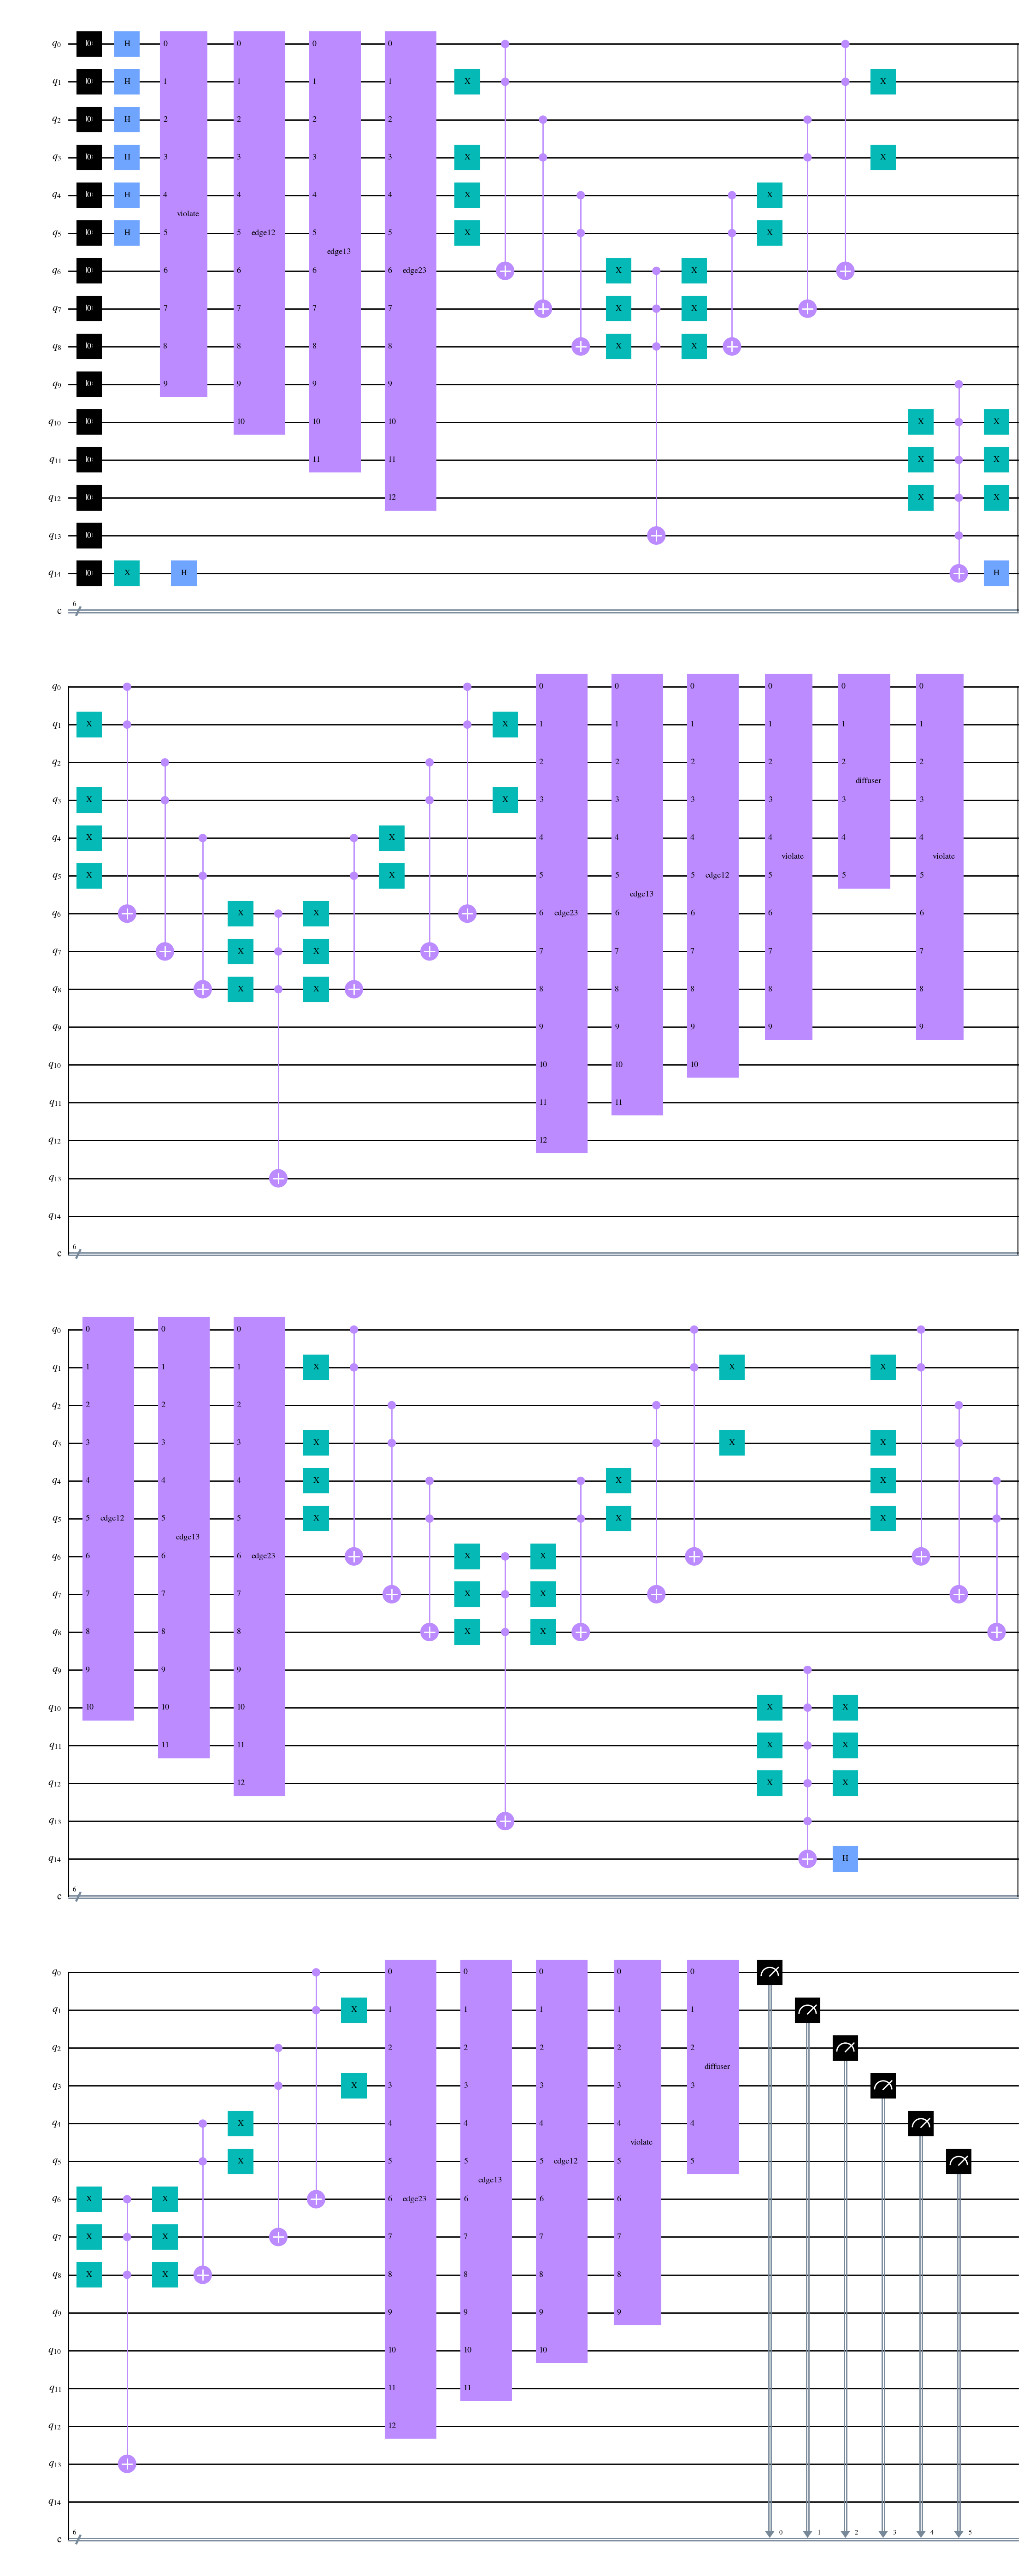

In [60]:
n_qubit = 15
n_matching = 6
grover_circuit = QuantumCircuit(n_qubit, n_matching)
grover_circuit.reset(range(0, 15))
grover_circuit = initialize_s(grover_circuit, n_qubit, n_matching)
for i in range(2):
    #grover_circuit = violate_state(grover_circuit)
    grover_circuit.append(violate_state(), [0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
    grover_circuit.append(compare_node1_node2(), [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
    grover_circuit.append(compare_node1_node3(), [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
    grover_circuit.append(compare_node2_node3(), [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
    grover_circuit = weight_ver2(grover_circuit)
    #grover_circuit.append(weight(), [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13])
    grover_circuit.x([10, 11, 12])
    grover_circuit.mcx([9, 10, 11, 12, 13], 14)
    grover_circuit.x([10, 11, 12])
    grover_circuit.h([14])
    grover_circuit = weight_ver2(grover_circuit)
    #grover_circuit.append(weight(), [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13])
    grover_circuit.append(compare_node2_node3(), [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
    grover_circuit.append(compare_node1_node3(), [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
    grover_circuit.append(compare_node1_node2(), [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
    grover_circuit.append(violate_state(), [0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
    grover_circuit.append(diffuser(6), [0, 1, 2, 3, 4, 5])
    
grover_circuit.measure([0, 1, 2, 3, 4, 5], [0, 1, 2, 3, 4, 5])
grover_circuit.draw(output = "mpl", scale =1, plot_barriers = False)

In [28]:
from qiskit import BasicAer, Aer,execute
sim = Aer.get_backend('aer_simulator')

In [29]:
job = execute(grover_circuit, backend = sim, shots = 1024)

In [30]:
counts = job.result().get_counts()

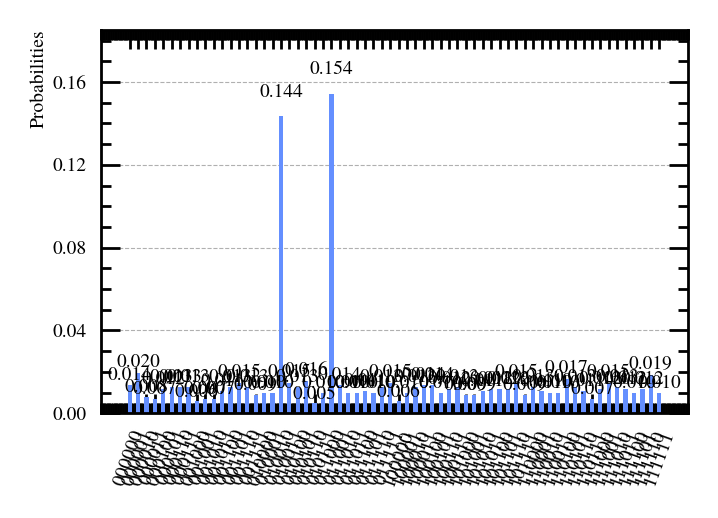

In [31]:
plot_histogram(counts)

In [14]:
IBMQ.save_account('e98108019189dbd357958aedc14339c82ad0b0e12ec45536f7b7604eb16e2ff549e5041663ac8cffac7a0e0a8843588f4b839d6bad9851ca44c04aa29b273ba0', overwrite=True)

In [15]:
provider = IBMQ.load_account()

In [16]:
provider = IBMQ.get_provider(hub='ibm-q-skku', group='korea-university', project='ku-students')

#backends = provider.backends()

In [17]:
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q-skku', group='korea-university', project='ku-students')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q-skku', group='korea-university', project='ku-students')>,
 <IBMQBackend('ibmq_montreal') from IBMQ(hub='ibm-q-skku', group='korea-university', project='ku-students')>,
 <IBMQBackend('ibmq_toronto') from IBMQ(hub='ibm-q-skku', group='korea-university', project='ku-students')>,
 <IBMQBackend('ibmq_kolkata') from IBMQ(hub='ibm-q-skku', group='korea-university', project='ku-students')>,
 <IBMQBackend('ibmq_mumbai') from IBMQ(hub='ibm-q-skku', group='korea-university', project='ku-students')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q-skku', group='korea-university', project='ku-students')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q-skku', group='korea-university', project='ku-students')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q-skku', group='korea-university', project='ku-students')>,
 <IBMQBackend('ibm

In [18]:
device = provider.backends()[5]

In [19]:
device

<IBMQBackend('ibmq_mumbai') from IBMQ(hub='ibm-q-skku', group='korea-university', project='ku-students')>

In [20]:
# Run our circuit on the least busy backend. Monitor the execution of the job in the queue
from qiskit.tools.monitor import job_monitor
transpiled_grover_circuit = transpile(grover_circuit, device, optimization_level=1)
job = device.run(transpiled_grover_circuit)
job_monitor(job, interval=2)

Job Status: job has successfully run


In [21]:
# Get the results from the computation
results = job.result()


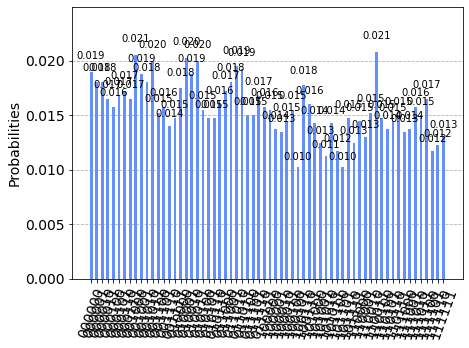

In [22]:
# Get the results from the computation
results = job.result()
answer = results.get_counts(grover_circuit)
plot_histogram(answer)

In [32]:
import mplhep
import numpy as np
import uproot
import math
from matplotlib import pyplot as plt
from tqdm import tqdm

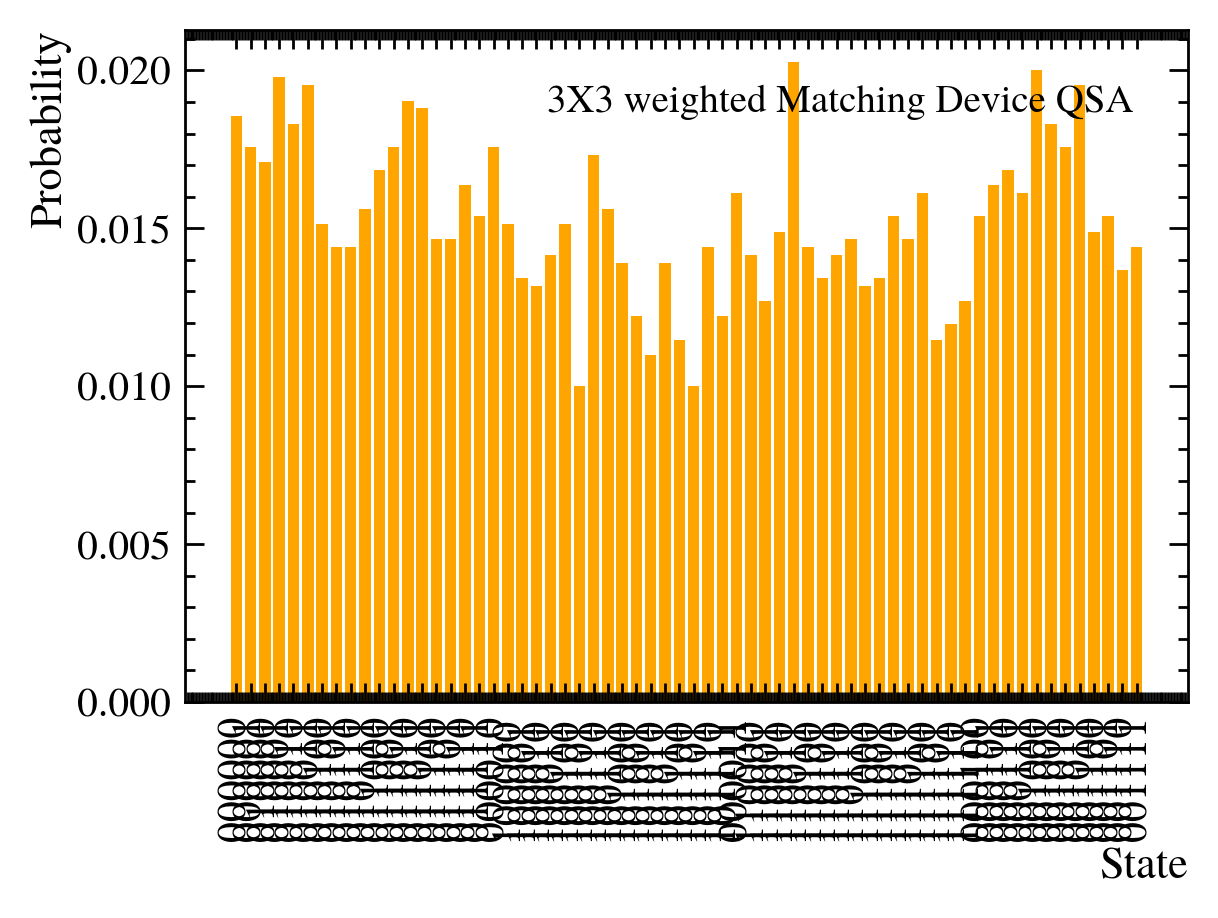

In [63]:
plt.style.use(mplhep.style.LHCb2)  # CMS or ATLAS/LHCb
#이미지의 이름을 label= '(이름)'으로 사용. Latex식 수식 지원.
plt.plot([], [], ' ', label='3X3 weighted Matching Device QSA')

x = np.array(list(answer.keys()))
y = np.array(list(answer.values()))
plt.bar(x, y/4096, color = 'orange')
#plt.bar(x[y > 50], y[y > 50]/1024, color = 'orange')
#plt.bar(list(counts.keys()), list(counts.values()), color = "orange")

#x,y축 이름 지정
plt.xlabel('State')
plt.ylabel('Probability')

#y축 log scale. 비활성화는 밑줄을 지우면 됨
#plt.yscale('log')

#x축 범위. y축도 동일하게 plt.ylim으로 지정가능
#plt.xlim(0,10)
plt.legend()
plt.xticks(rotation=90)
#이미지를 경로에 저장. 확장자는 .pdf, .png, .jpeg등 가능
plt.savefig('3X3weightedMatchingDeviceQSAunfilter.pdf')
# plt.xlim(0,17)
#이미지 저장을 비활성화할시 plt.show()를 사용해야함
plt.show()